# IE 421 Data Wizards of Gandalf / Beyond the Medal

## **Data Understanding and Cleaning**

In [2]:
import pandas as pd

df = pd.read_csv('paris2024_athletes.csv')

In [3]:
df.head()

name gender nationality_long    disciplines
0   ALEKSANYAN Artur   Male          Armenia  ['Wrestling']
1     AMOYAN Malkhas   Male          Armenia  ['Wrestling']
2    GALSTYAN Slavik   Male          Armenia  ['Wrestling']
3  HARUTYUNYAN Arsen   Male          Armenia  ['Wrestling']
4    TEVANYAN Vazgen   Male          Armenia  ['Wrestling']

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
name                0
gender              0
nationality_long    3
disciplines         0
dtype: int64


In [7]:
print("\nNumber of Duplicates:", df.duplicated().sum())


Number of Duplicates: 0


In [8]:
print("\nUnique Values in Gender Column:", df['gender'].unique())
print("Unique Values in Sport Branch Column:", df['disciplines'].nunique())
print("Unique Values in Nationality Column:", df['nationality_long'].nunique())


Unique Values in Gender Column: ['Male' 'Female']
Unique Values in Sport Branch Column: 52
Unique Values in Nationality Column: 197


In [9]:
print("\nGender Distribution:")
print(df['gender'].value_counts())


Gender Distribution:
gender
Male      5658
Female    5455
Name: count, dtype: int64


In [5]:
# Clean all columns in the DataFrame
for col in df.columns:
    df[col] = df[col].map(lambda x: x.strip("[]").replace("'", "") if isinstance(x, str) else x)

In [6]:
df

name  gender   nationality_long disciplines
0       ALEKSANYAN Artur    Male            Armenia   Wrestling
1         AMOYAN Malkhas    Male            Armenia   Wrestling
2        GALSTYAN Slavik    Male            Armenia   Wrestling
3      HARUTYUNYAN Arsen    Male            Armenia   Wrestling
4        TEVANYAN Vazgen    Male            Armenia   Wrestling
...                  ...     ...                ...         ...
11108     ADA ETO Sefora  Female  Equatorial Guinea   Athletics
11109    LIUZZI Emanuela  Female                NaN   Wrestling
11110       BOERS Isayah    Male        Netherlands   Athletics
11111        STAUT Kevin    Male             France  Equestrian
11112    CARVELL Charlie    Male      Great Britain   Athletics

[11113 rows x 4 columns]

In [11]:
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
                   name gender          nationality_long disciplines
count             11113  11113                     11110       11113
unique            11103      2                       197          50
top     ELSAYED Mohamed   Male  United States of America   Athletics
freq                  2   5658                       696        2020


In [13]:
gender_sport_dist = df.groupby(['disciplines', 'gender']).size().unstack()
print("\nGender Distribution by Sport:")
print(gender_sport_dist)


Gender Distribution by Sport:
gender                               Female    Male
disciplines                                        
3x3 Basketball                         32.0    32.0
3x3 Basketball, Basketball              1.0     NaN
Archery                                64.0    64.0
Artistic Gymnastics                    94.0    96.0
Artistic Swimming                     106.0     NaN
Athletics                             982.0  1038.0
Badminton                              87.0    88.0
Basketball                            143.0   144.0
Beach Volleyball                       48.0    48.0
Boxing                                124.0   124.0
Breaking                               17.0    16.0
Canoe Slalom                           41.0    43.0
Canoe Sprint                          120.0   119.0
Cycling BMX Freestyle                  12.0    12.0
Cycling BMX Racing                     33.0    34.0
Cycling Mountain Bike                  33.0    35.0
Cycling Road                     

In [16]:
# Top 10 sports by participation
top_sports = df['disciplines'].value_counts().head(10)
print("\nTop 10 Sports by Participation:")
print(top_sports)

# Top 10 nationalities by participation
top_nationalities = df['nationality_long'].value_counts().head(10)
print("\nTop 10 Nationalities by Participation:")
print(top_nationalities)



Top 10 Sports by Participation:
disciplines
Athletics       2020
Swimming         836
Football         553
Rowing           493
Hockey           415
Handball         386
Judo             378
Shooting         342
Sailing          330
Rugby Sevens     317
Name: count, dtype: int64

Top 10 Nationalities by Participation:
nationality_long
United States of America     696
France                       607
Australia                    476
Germany                      457
Japan                        431
Spain                        403
Peoples Republic of China    398
Italy                        397
Great Britain                357
Canada                       336
Name: count, dtype: int64


In [17]:
# Gender proportion by nationality
gender_nationality_dist = df.groupby(['nationality_long', 'gender']).size().unstack()
gender_nationality_dist = gender_nationality_dist.fillna(0)  # Fill missing values with 0
gender_nationality_dist['Total'] = gender_nationality_dist.sum(axis=1)
gender_nationality_dist['Male %'] = (gender_nationality_dist['Male'] / gender_nationality_dist['Total']) * 100
gender_nationality_dist['Female %'] = (gender_nationality_dist['Female'] / gender_nationality_dist['Total']) * 100

print("\nGender Proportion by Nationality:")
print(gender_nationality_dist[['Male %', 'Female %']].sort_values(by='Male %', ascending=False))



Gender Proportion by Nationality:
gender                               Male %    Female %
nationality_long                                       
Belize                           100.000000    0.000000
Liechtenstein                    100.000000    0.000000
Nauru                            100.000000    0.000000
Iraq                             100.000000    0.000000
Guinea-Bissau                    100.000000    0.000000
...                                     ...         ...
Lao Peoples Democratic Republic   25.000000   75.000000
Kosovo                            22.222222   77.777778
Nicaragua                         14.285714   85.714286
Haiti                              0.000000  100.000000
Solomon Islands                    0.000000  100.000000

[197 rows x 2 columns]


In [7]:
# Gender proportion by nationality
gender_nationality_dist = df.groupby(['nationality_long', 'gender']).size().unstack()
gender_nationality_dist = gender_nationality_dist.fillna(0) # Fill missing values with 0

# Calculate the total number of athletes per country
gender_nationality_dist['Total Athletes'] = gender_nationality_dist.sum(axis=1)

# Calculate the percentage of male and female athletes
gender_nationality_dist['Male %'] = (gender_nationality_dist['Male'] / gender_nationality_dist['Total Athletes']) * 100
gender_nationality_dist['Female %'] = (gender_nationality_dist['Female'] / gender_nationality_dist['Total Athletes']) * 100

# Display the results
print("\nGender Proportion by Nationality:")
print(gender_nationality_dist[['Total Athletes', 'Male %', 'Female %']].sort_values(by='Male %', ascending=False))


Gender Proportion by Nationality:
gender                           Total Athletes      Male %    Female %
nationality_long                                                       
Belize                                      1.0  100.000000    0.000000
Liechtenstein                               1.0  100.000000    0.000000
Nauru                                       1.0  100.000000    0.000000
Iraq                                       23.0  100.000000    0.000000
Guinea-Bissau                               6.0  100.000000    0.000000
...                                         ...         ...         ...
Lao Peoples Democratic Republic             4.0   25.000000   75.000000
Kosovo                                      9.0   22.222222   77.777778
Nicaragua                                   7.0   14.285714   85.714286
Haiti                                       1.0    0.000000  100.000000
Solomon Islands                             2.0    0.000000  100.000000

[197 rows x 3 columns]


In [19]:
# Check for imbalances in gender
gender_counts = df['gender'].value_counts(normalize=True) * 100
print("\nGender Percentage Distribution:")
print(gender_counts)

# Check for imbalances in sports and nationalities
sport_counts = df['disciplines'].value_counts()
print("\nSport Participation Distribution:")
print(sport_counts.describe())

nationality_counts = df['nationality_long'].value_counts()
print("\nNationality Participation Distribution:")
print(nationality_counts.describe())


Gender Percentage Distribution:
gender
Male      50.913345
Female    49.086655
Name: proportion, dtype: float64

Sport Participation Distribution:
count      50.000000
mean      222.260000
std       306.939588
min         1.000000
25%        68.000000
50%       134.500000
75%       286.750000
max      2020.000000
Name: count, dtype: float64

Nationality Participation Distribution:
count    197.000000
mean      56.395939
std      108.373342
min        1.000000
25%        5.000000
50%       13.000000
75%       55.000000
max      696.000000
Name: count, dtype: float64


In [8]:
# Gender proportion by nationality
gender_nationality_dist = df.groupby(['nationality_long', 'gender']).size().unstack()
gender_nationality_dist = gender_nationality_dist.fillna(0) # Fill missing values with 0

# Calculate the total number of athletes per country
gender_nationality_dist['Total Athletes'] = gender_nationality_dist.sum(axis=1)

# Calculate the percentage of male and female athletes
gender_nationality_dist['Male %'] = (gender_nationality_dist['Male'] / gender_nationality_dist['Total Athletes']) * 100
gender_nationality_dist['Female %'] = (gender_nationality_dist['Female'] / gender_nationality_dist['Total Athletes']) * 100

# Sort by Total Athletes in descending order and select the top 10 countries
top_10_countries = gender_nationality_dist.sort_values(by='Total Athletes', ascending=False).head(10)

# Display the results
print("\nGender Proportion by Nationality (Top 10 Countries by Total Athletes):")
print(top_10_countries[['Total Athletes', 'Male %', 'Female %']])


Gender Proportion by Nationality (Top 10 Countries by Total Athletes):
gender                     Total Athletes     Male %   Female %
nationality_long                                               
United States of America            696.0  47.270115  52.729885
France                              607.0  51.070840  48.929160
Australia                           476.0  44.117647  55.882353
Germany                             457.0  50.765864  49.234136
Japan                               431.0  53.364269  46.635731
Spain                               403.0  49.875931  50.124069
Peoples Republic of China           398.0  33.668342  66.331658
Italy                               397.0  51.889169  48.110831
Great Britain                       357.0  48.459384  51.540616
Canada                              336.0  39.285714  60.714286


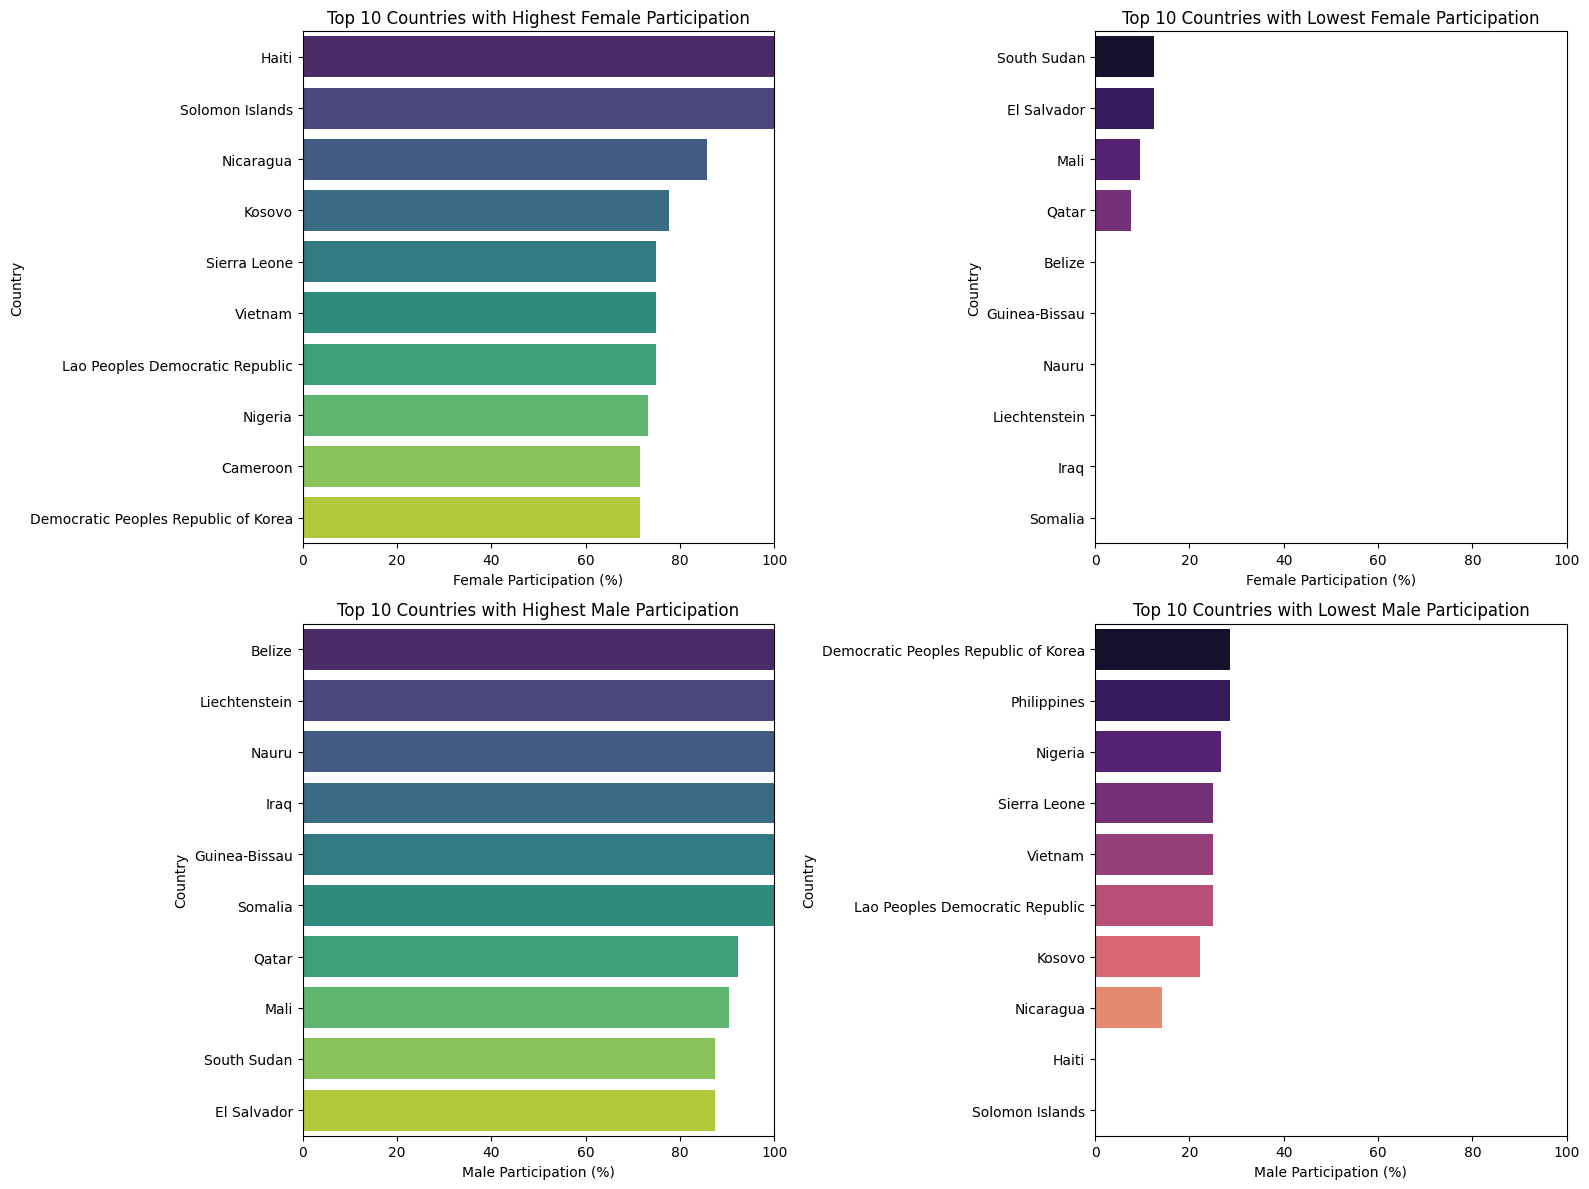

Top 10 Countries with Highest Female Participation:
gender                                Total Athletes    Female %     Male %
nationality_long                                                           
Haiti                                            1.0  100.000000   0.000000
Solomon Islands                                  2.0  100.000000   0.000000
Nicaragua                                        7.0   85.714286  14.285714
Kosovo                                           9.0   77.777778  22.222222
Sierra Leone                                     4.0   75.000000  25.000000
Vietnam                                         16.0   75.000000  25.000000
Lao Peoples Democratic Republic                  4.0   75.000000  25.000000
Nigeria                                         86.0   73.255814  26.744186
Cameroon                                         7.0   71.428571  28.571429
Democratic Peoples Republic of Korea            14.0   71.428571  28.571429

Top 10 Countries with Lowest Female

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gender proportion by nationality
gender_nationality_dist = df.groupby(['nationality_long', 'gender']).size().unstack()
gender_nationality_dist = gender_nationality_dist.fillna(0) # Fill missing values with 0

# Calculate the total number of athletes per country
gender_nationality_dist['Total Athletes'] = gender_nationality_dist.sum(axis=1)

# Calculate the percentage of male and female athletes
gender_nationality_dist['Male %'] = (gender_nationality_dist['Male'] / gender_nationality_dist['Total Athletes']) * 100
gender_nationality_dist['Female %'] = (gender_nationality_dist['Female'] / gender_nationality_dist['Total Athletes']) * 100

# Sort by Female % to get countries with highest and lowest female participation
sorted_by_female = gender_nationality_dist.sort_values(by='Female %', ascending=False)

# Sort by Male % to get countries with highest and lowest male participation
sorted_by_male = gender_nationality_dist.sort_values(by='Male %', ascending=False)

# Top 10 countries with highest and lowest female participation
top_10_highest_female = sorted_by_female.head(10)
top_10_lowest_female = sorted_by_female.tail(10)

# Top 10 countries with highest and lowest male participation
top_10_highest_male = sorted_by_male.head(10)
top_10_lowest_male = sorted_by_male.tail(10)

# Visualization
plt.figure(figsize=(16, 12))

# Plot for top 10 countries with highest female participation
plt.subplot(2, 2, 1)
sns.barplot(x=top_10_highest_female['Female %'], y=top_10_highest_female.index, hue=top_10_highest_female.index, palette='viridis', legend=False)
plt.title('Top 10 Countries with Highest Female Participation')
plt.xlabel('Female Participation (%)')
plt.ylabel('Country')
plt.xlim(0, 100)

# Plot for top 10 countries with lowest female participation
plt.subplot(2, 2, 2)
sns.barplot(x=top_10_lowest_female['Female %'], y=top_10_lowest_female.index, hue=top_10_lowest_female.index, palette='magma', legend=False)
plt.title('Top 10 Countries with Lowest Female Participation')
plt.xlabel('Female Participation (%)')
plt.ylabel('Country')
plt.xlim(0, 100)

# Plot for top 10 countries with highest male participation
plt.subplot(2, 2, 3)
sns.barplot(x=top_10_highest_male['Male %'], y=top_10_highest_male.index, hue=top_10_highest_male.index, palette='viridis', legend=False)
plt.title('Top 10 Countries with Highest Male Participation')
plt.xlabel('Male Participation (%)')
plt.ylabel('Country')
plt.xlim(0, 100)

# Plot for top 10 countries with lowest male participation
plt.subplot(2, 2, 4)
sns.barplot(x=top_10_lowest_male['Male %'], y=top_10_lowest_male.index, hue=top_10_lowest_male.index, palette='magma', legend=False)
plt.title('Top 10 Countries with Lowest Male Participation')
plt.xlabel('Male Participation (%)')
plt.ylabel('Country')
plt.xlim(0, 100)

plt.tight_layout()
plt.show()

# Print the data for reference
print("Top 10 Countries with Highest Female Participation:")
print(top_10_highest_female[['Total Athletes', 'Female %', 'Male %']])

print("\nTop 10 Countries with Lowest Female Participation:")
print(top_10_lowest_female[['Total Athletes', 'Female %', 'Male %']])

print("\nTop 10 Countries with Highest Male Participation:")
print(top_10_highest_male[['Total Athletes', 'Male %', 'Female %']])

print("\nTop 10 Countries with Lowest Male Participation:")
print(top_10_lowest_male[['Total Athletes', 'Male %', 'Female %']])

## **Exploratory Data Analysis (EDA)**


Overall Gender Distribution:
gender
Male      5658
Female    5455
Name: count, dtype: int64


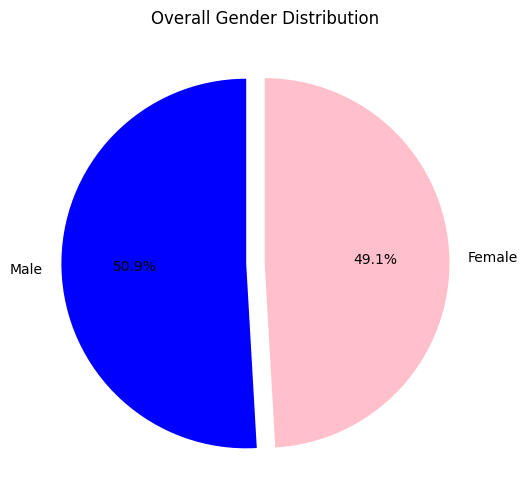

In [20]:
# Gender distribution
gender_counts = df['gender'].value_counts()
print("\nOverall Gender Distribution:")
print(gender_counts)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90, explode=(0.1, 0))
plt.title('Overall Gender Distribution')
plt.ylabel('')
plt.show()



Gender Distribution by Sport:
gender                               Female  Male
disciplines                                      
3x3 Basketball                           32    32
3x3 Basketball, Basketball                1     0
Archery                                  64    64
Artistic Gymnastics                      94    96
Artistic Swimming                       106     0
Athletics                               982  1038
Badminton                                87    88
Basketball                              143   144
Beach Volleyball                         48    48
Boxing                                  124   124
Breaking                                 17    16
Canoe Slalom                             41    43
Canoe Sprint                            120   119
Cycling BMX Freestyle                    12    12
Cycling BMX Racing                       33    34
Cycling Mountain Bike                    33    35
Cycling Road                             84    90
Cycling Road, Cycli

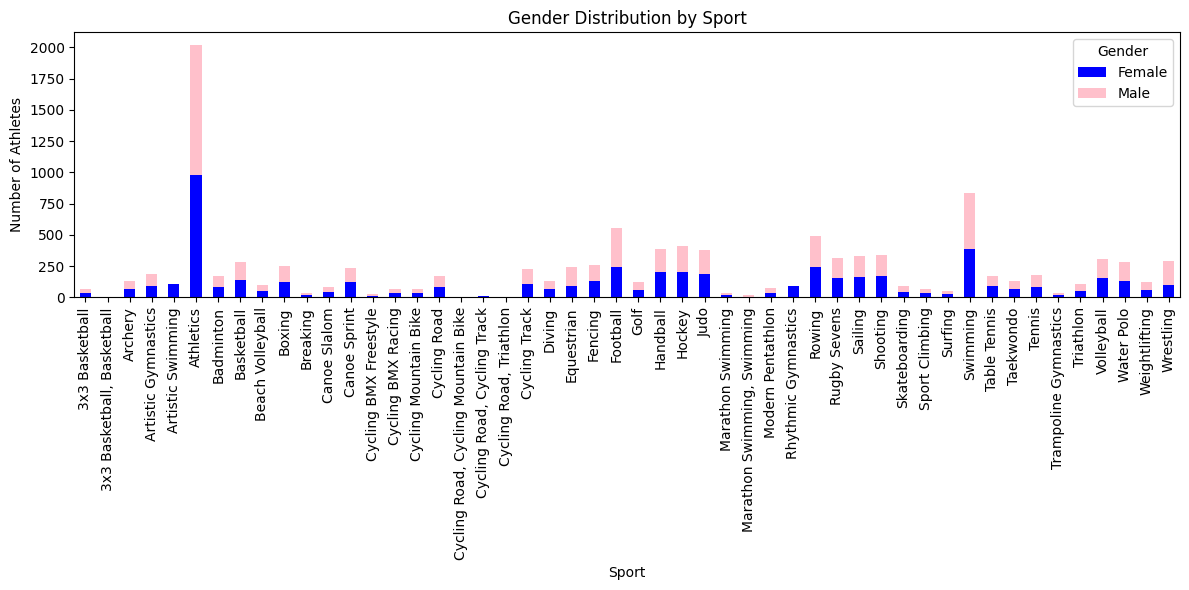

In [21]:
# Gender distribution by sport
gender_sport_dist = df.groupby(['disciplines', 'gender']).size().unstack(fill_value=0)
print("\nGender Distribution by Sport:")
print(gender_sport_dist)

# Visualization
gender_sport_dist.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'pink'])
plt.title('Gender Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


Gender Distribution by Nationality:
gender            Female  Male
nationality_long              
Afghanistan            5     6
Albania                3     5
Algeria               19    27
Andorra                1     1
Angola                17     8
...                  ...   ...
Venezuela             14    18
Vietnam               12     4
Yemen                  1     3
Zambia                22     9
Zimbabwe               2     5

[197 rows x 2 columns]


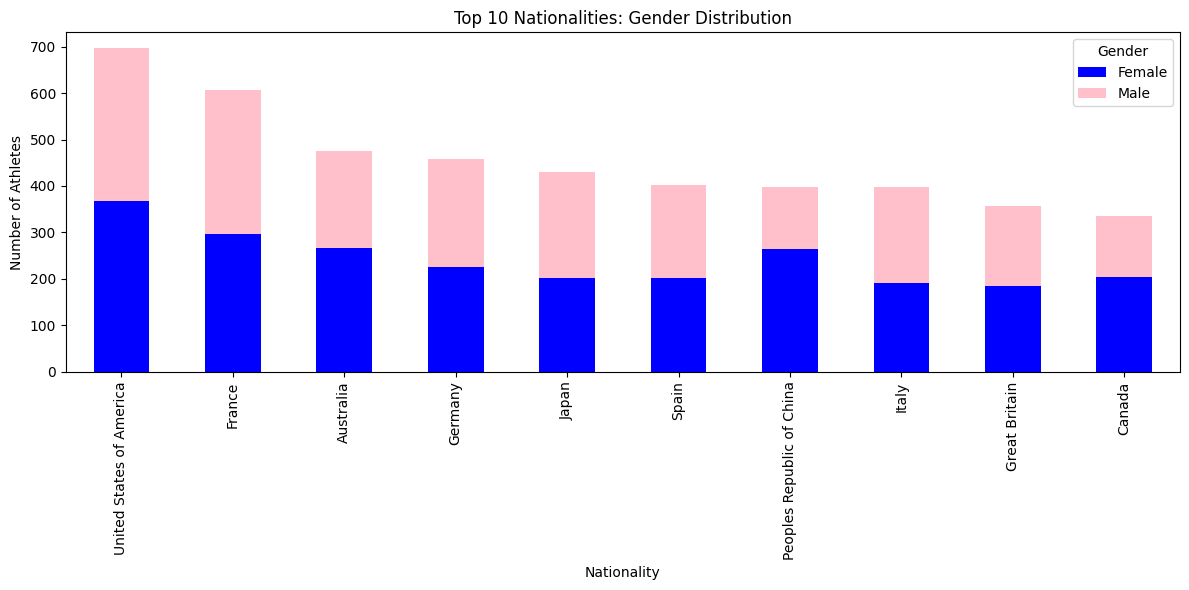

In [22]:
# Gender distribution by nationality
gender_nationality_dist = df.groupby(['nationality_long', 'gender']).size().unstack(fill_value=0)
print("\nGender Distribution by Nationality:")
print(gender_nationality_dist)

# Visualization
top_countries = gender_nationality_dist.sum(axis=1).sort_values(ascending=False).head(10).index
gender_nationality_dist.loc[top_countries].plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'pink'])
plt.title('Top 10 Nationalities: Gender Distribution')
plt.xlabel('Nationality')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


Top 10 Most Popular Sports:
disciplines
Athletics       2020
Swimming         836
Football         553
Rowing           493
Hockey           415
Handball         386
Judo             378
Shooting         342
Sailing          330
Rugby Sevens     317
Name: count, dtype: int64


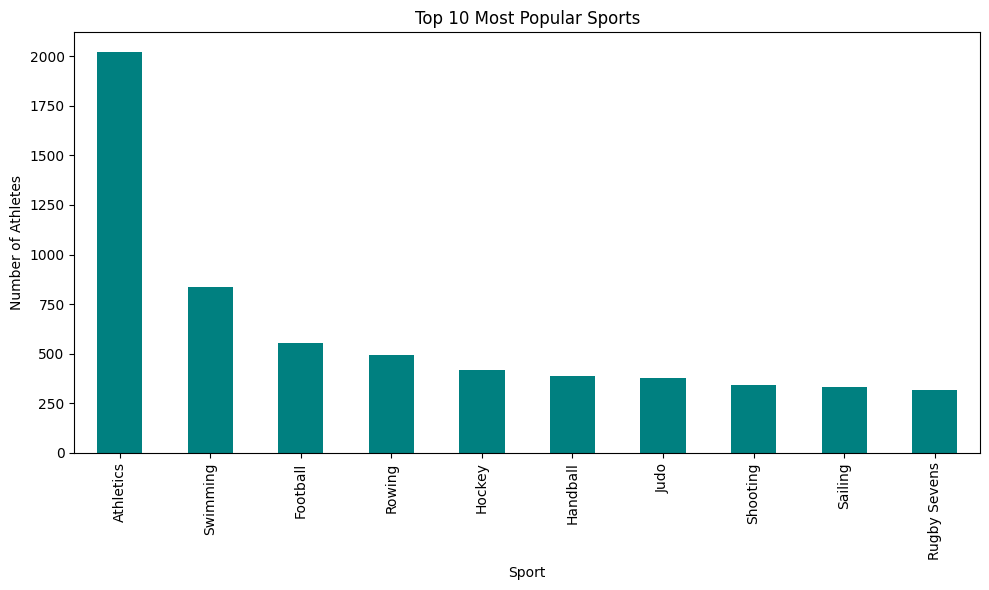

In [24]:
# Top sports
top_sports = df['disciplines'].value_counts().head(10)
print("\nTop 10 Most Popular Sports:")
print(top_sports)

# Visualization
plt.figure(figsize=(10, 6))
top_sports.plot(kind='bar', color='teal')
plt.title('Top 10 Most Popular Sports')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.tight_layout()
plt.show()


Top 10 Nationalities by Participation:
nationality_long
United States of America     696
France                       607
Australia                    476
Germany                      457
Japan                        431
Spain                        403
Peoples Republic of China    398
Italy                        397
Great Britain                357
Canada                       336
Name: count, dtype: int64


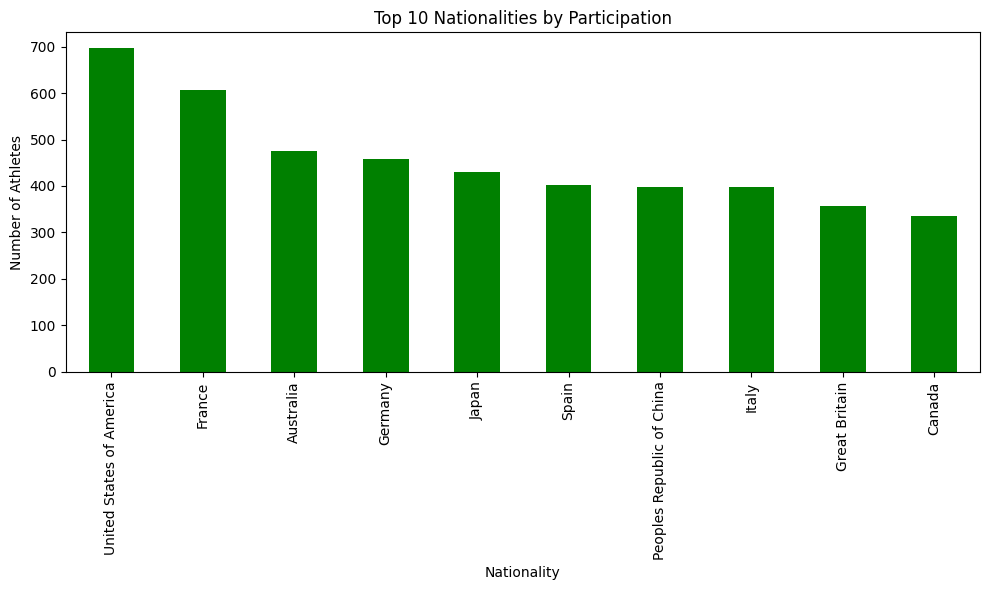

In [25]:
# Top nationalities
top_nationalities = df['nationality_long'].value_counts().head(10)
print("\nTop 10 Nationalities by Participation:")
print(top_nationalities)

# Visualization
plt.figure(figsize=(10, 6))
top_nationalities.plot(kind='bar', color='green')
plt.title('Top 10 Nationalities by Participation')
plt.xlabel('Nationality')
plt.ylabel('Number of Athletes')
plt.tight_layout()
plt.show()


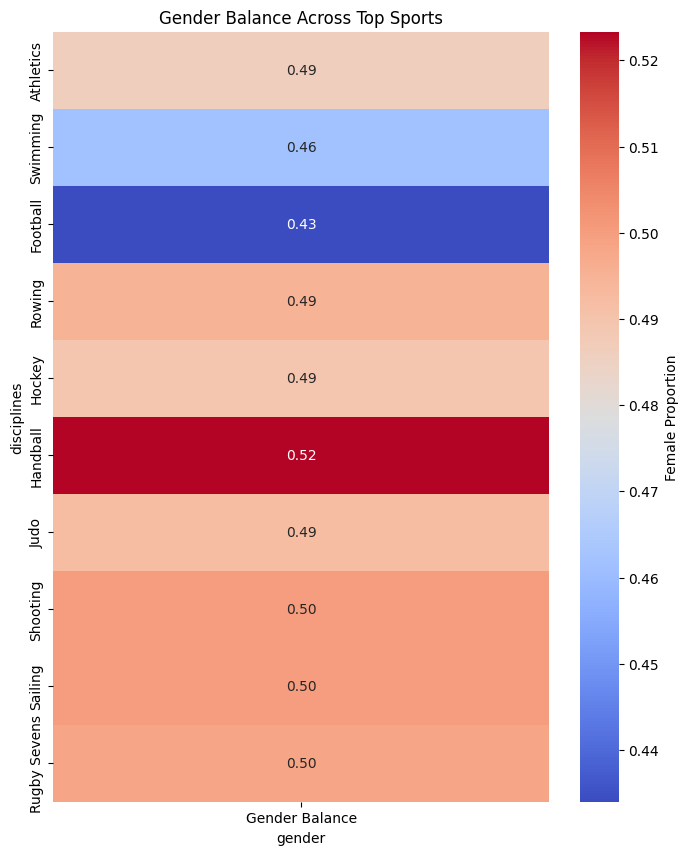

In [26]:
import seaborn as sns

# Gender ratio for sports and nationalities
gender_ratio = df.groupby(['disciplines', 'gender']).size().unstack(fill_value=0)
gender_ratio['Gender Balance'] = gender_ratio.apply(lambda row: row['Female'] / (row['Male'] + row['Female']), axis=1)

# Heatmap for top sports
top_sports_heatmap = gender_ratio.loc[top_sports.index][['Gender Balance']]
plt.figure(figsize=(8, 10))
sns.heatmap(top_sports_heatmap, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Female Proportion'})
plt.title('Gender Balance Across Top Sports')
plt.show()

# Statistical Analysis

In [28]:
from scipy.stats import chi2_contingency

# Gender and Sport
gender_sport_table = pd.crosstab(df['disciplines'], df['gender'])
chi2_sport, p_sport, dof_sport, expected_sport = chi2_contingency(gender_sport_table)

print("\nChi-Square Test for Independence (Gender vs. Sport):")
print(f"Chi2 Statistic: {chi2_sport:.2f}")
print(f"P-value: {p_sport:.4f}")
if p_sport < 0.05:
    print("Conclusion: Gender distribution is dependent on the sport.")
else:
    print("Conclusion: Gender distribution is independent of the sport.")

# Gender and Nationality
gender_nationality_table = pd.crosstab(df['nationality_long'], df['gender'])
chi2_nationality, p_nationality, dof_nationality, expected_nationality = chi2_contingency(gender_nationality_table)

print("\nChi-Square Test for Independence (Gender vs. Nationality):")
print(f"Chi2 Statistic: {chi2_nationality:.2f}")
print(f"P-value: {p_nationality:.4f}")
if p_nationality < 0.05:
    print("Conclusion: Gender distribution is dependent on nationality.")
else:
    print("Conclusion: Gender distribution is independent of nationality.")



Chi-Square Test for Independence (Gender vs. Sport):
Chi2 Statistic: 272.92
P-value: 0.0000
Conclusion: Gender distribution is dependent on the sport.

Chi-Square Test for Independence (Gender vs. Nationality):
Chi2 Statistic: 517.53
P-value: 0.0000
Conclusion: Gender distribution is dependent on nationality.


In [30]:
from scipy.stats import f_oneway

# Gender counts across sports
sports_gender_groups = [df[df['disciplines'] == sport]['gender'].value_counts(normalize=True) for sport in df['disciplines'].unique()]

# One-way ANOVA
anova_sports = f_oneway(*sports_gender_groups)
print("\nANOVA Test for Gender Proportions Across Sports:")
print(f"F-Statistic: {anova_sports.statistic:.2f}")
print(f"P-value: {anova_sports.pvalue:.4f}")
if anova_sports.pvalue < 0.05:
    print("Conclusion: There is a significant difference in gender representation across sports.")
else:
    print("Conclusion: There is no significant difference in gender representation across sports.")



ANOVA Test for Gender Proportions Across Sports:
F-Statistic: 2.56
P-value: 0.0008
Conclusion: There is a significant difference in gender representation across sports.


# Advanced Visuals

### Gender Distribution Across Sports

In [2]:
import matplotlib.pyplot as plt  # Importing matplotlib
import seaborn as sns  # Importing seaborn

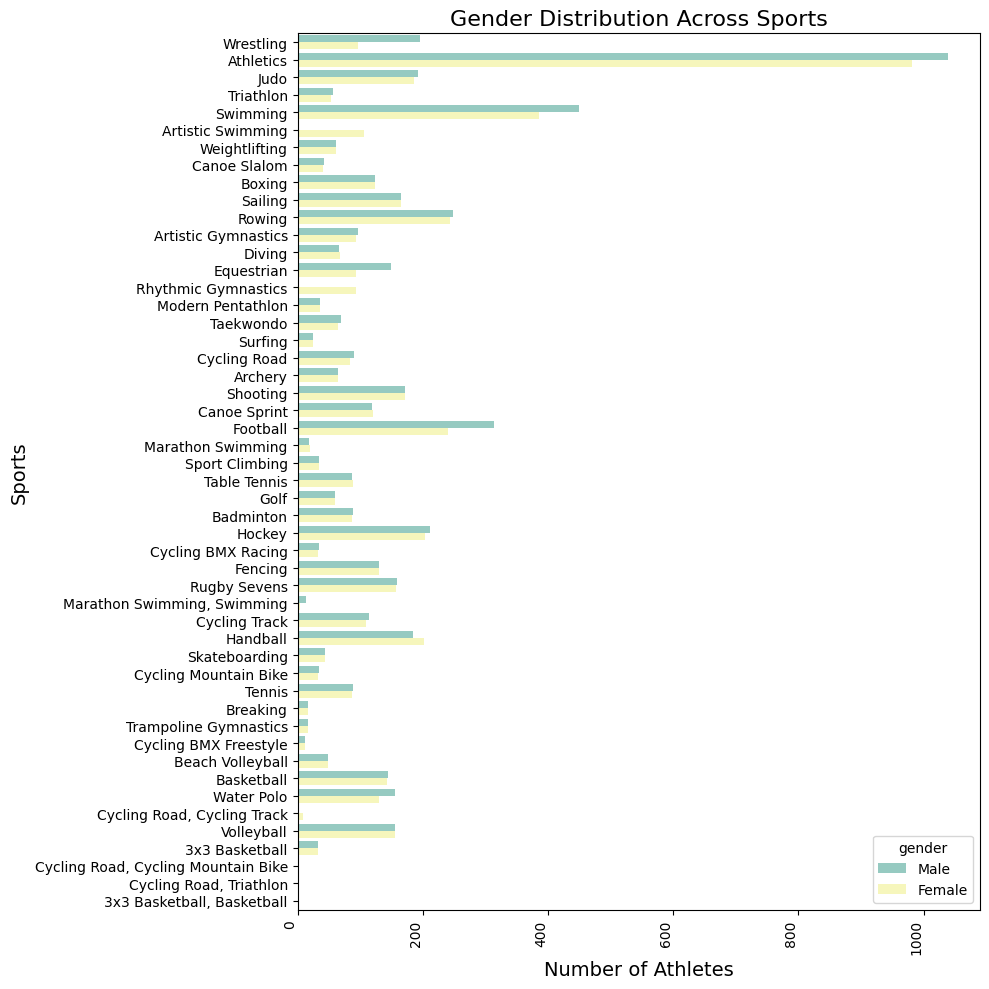

In [24]:
import matplotlib.pyplot as plt  # Importing matplotlib
import seaborn as sns  # Importing seaborn

# Assuming df is your DataFrame and it's already loaded

plt.figure(figsize=(10, 10))

# Create a countplot for gender distribution within each sport
sns.countplot(data=df, y='disciplines', hue='gender', palette='Set3')

# Rotate x-axis labels for readability
plt.xticks(rotation=90, ha='right')

# Set title and labels
plt.title('Gender Distribution Across Sports', fontsize=16)
plt.xlabel('Number of Athletes', fontsize=14)
plt.ylabel('Sports', fontsize=14)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('gender_distribution_across_allsportsbranch.png', dpi=300)

# Show the plot
plt.show()


### Female-Male Dominant Sports

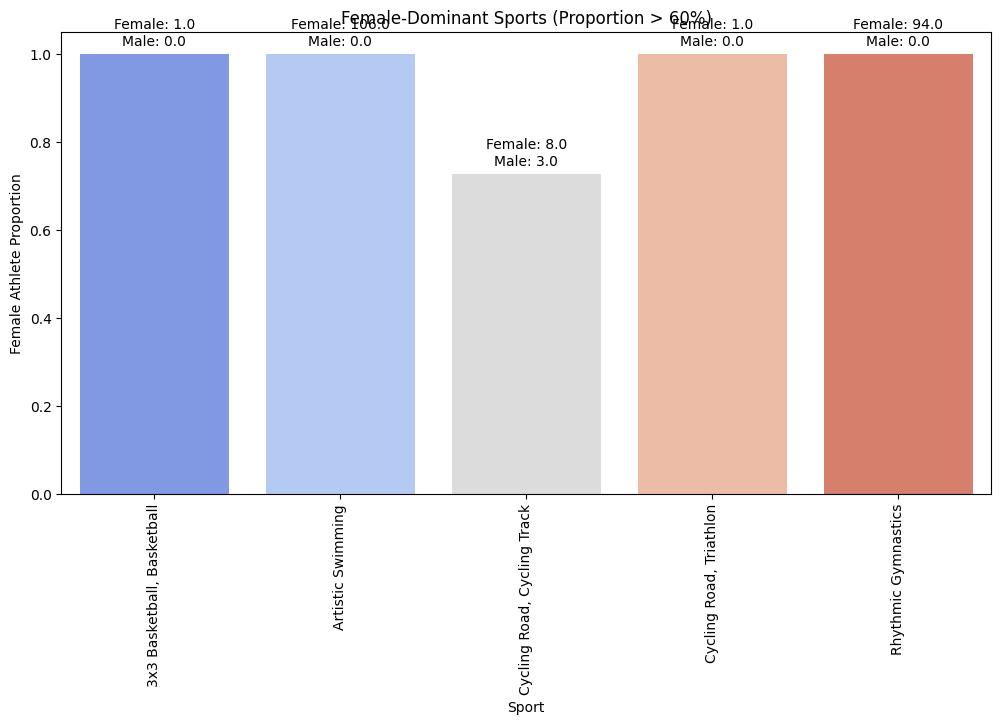

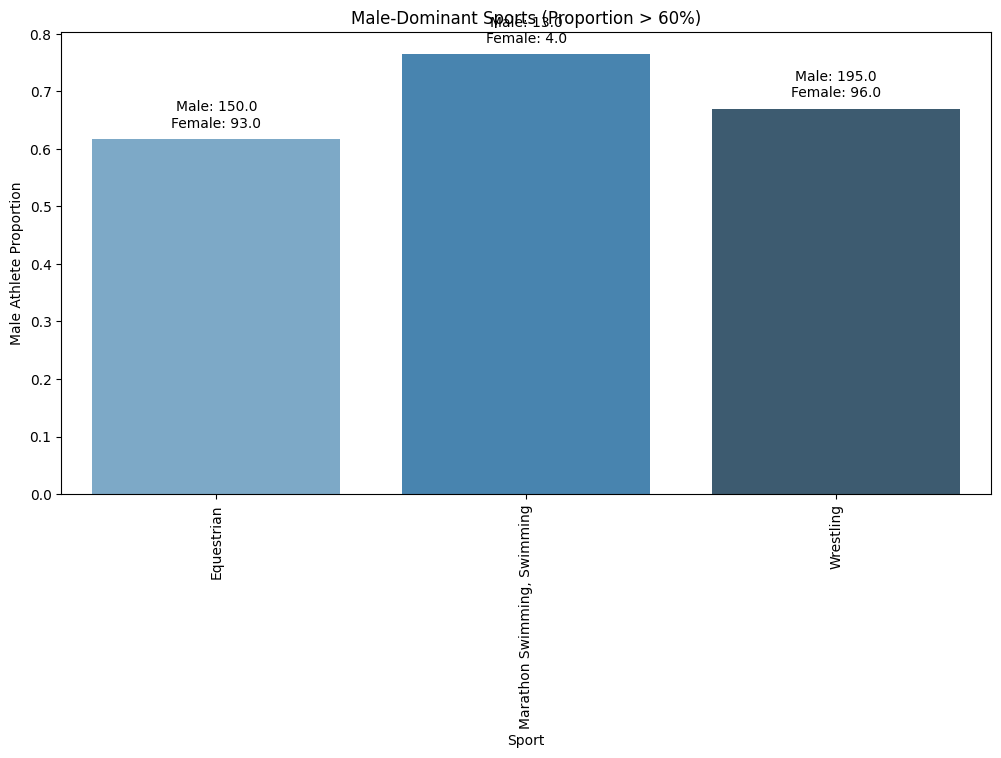

In [35]:
# Step 1: Calculate the number of male and female athletes per sport
gender_counts = df.groupby(['disciplines', 'gender']).size().unstack(fill_value=0)

# Step 2: Calculate the total number of athletes per sport
gender_counts['Total'] = gender_counts['Female'] + gender_counts['Male']

# Step 3: Calculate the proportion of female and male athletes per sport
gender_counts['FemaleProportion'] = gender_counts['Female'] / gender_counts['Total']
gender_counts['MaleProportion'] = gender_counts['Male'] / gender_counts['Total']

# Step 4: Identify female-dominant sports (female proportion > 0.6)
female_dominant_sports = gender_counts[gender_counts['FemaleProportion'] > 0.6]

# Step 5: Identify male-dominant sports (male proportion > 0.6)
male_dominant_sports = gender_counts[gender_counts['MaleProportion'] > 0.6]

# Step 6: Plot Female-Dominant Sports (Fixed Warning)
plt.figure(figsize=(12, 6))
sns.barplot(x=female_dominant_sports.index, y=female_dominant_sports['FemaleProportion'], hue=female_dominant_sports.index, palette="coolwarm", legend=False)
plt.title("Female-Dominant Sports (Proportion > 60%)")
plt.xlabel("Sport")
plt.ylabel("Female Athlete Proportion")

# Annotate with female and male counts
for i, row in female_dominant_sports.iterrows():
    plt.text(i, row['FemaleProportion'] + 0.02, f"Female: {row['Female']}\nMale: {row['Male']}",
             ha='center', color='black', fontsize=10)

plt.xticks(rotation=90)
plt.show()

# Step 7: Plot Male-Dominant Sports
plt.figure(figsize=(12, 6))
sns.barplot(x=male_dominant_sports.index, y=male_dominant_sports['MaleProportion'], hue=male_dominant_sports.index, palette="Blues_d", legend=False)
plt.title("Male-Dominant Sports (Proportion > 60%)")
plt.xlabel("Sport")
plt.ylabel("Male Athlete Proportion")

# Annotate with female and male counts
for i, row in male_dominant_sports.iterrows():
    plt.text(i, row['MaleProportion'] + 0.02, f"Male: {row['Male']}\nFemale: {row['Female']}",
             ha='center', color='black', fontsize=10)

plt.xticks(rotation=90)
plt.show()

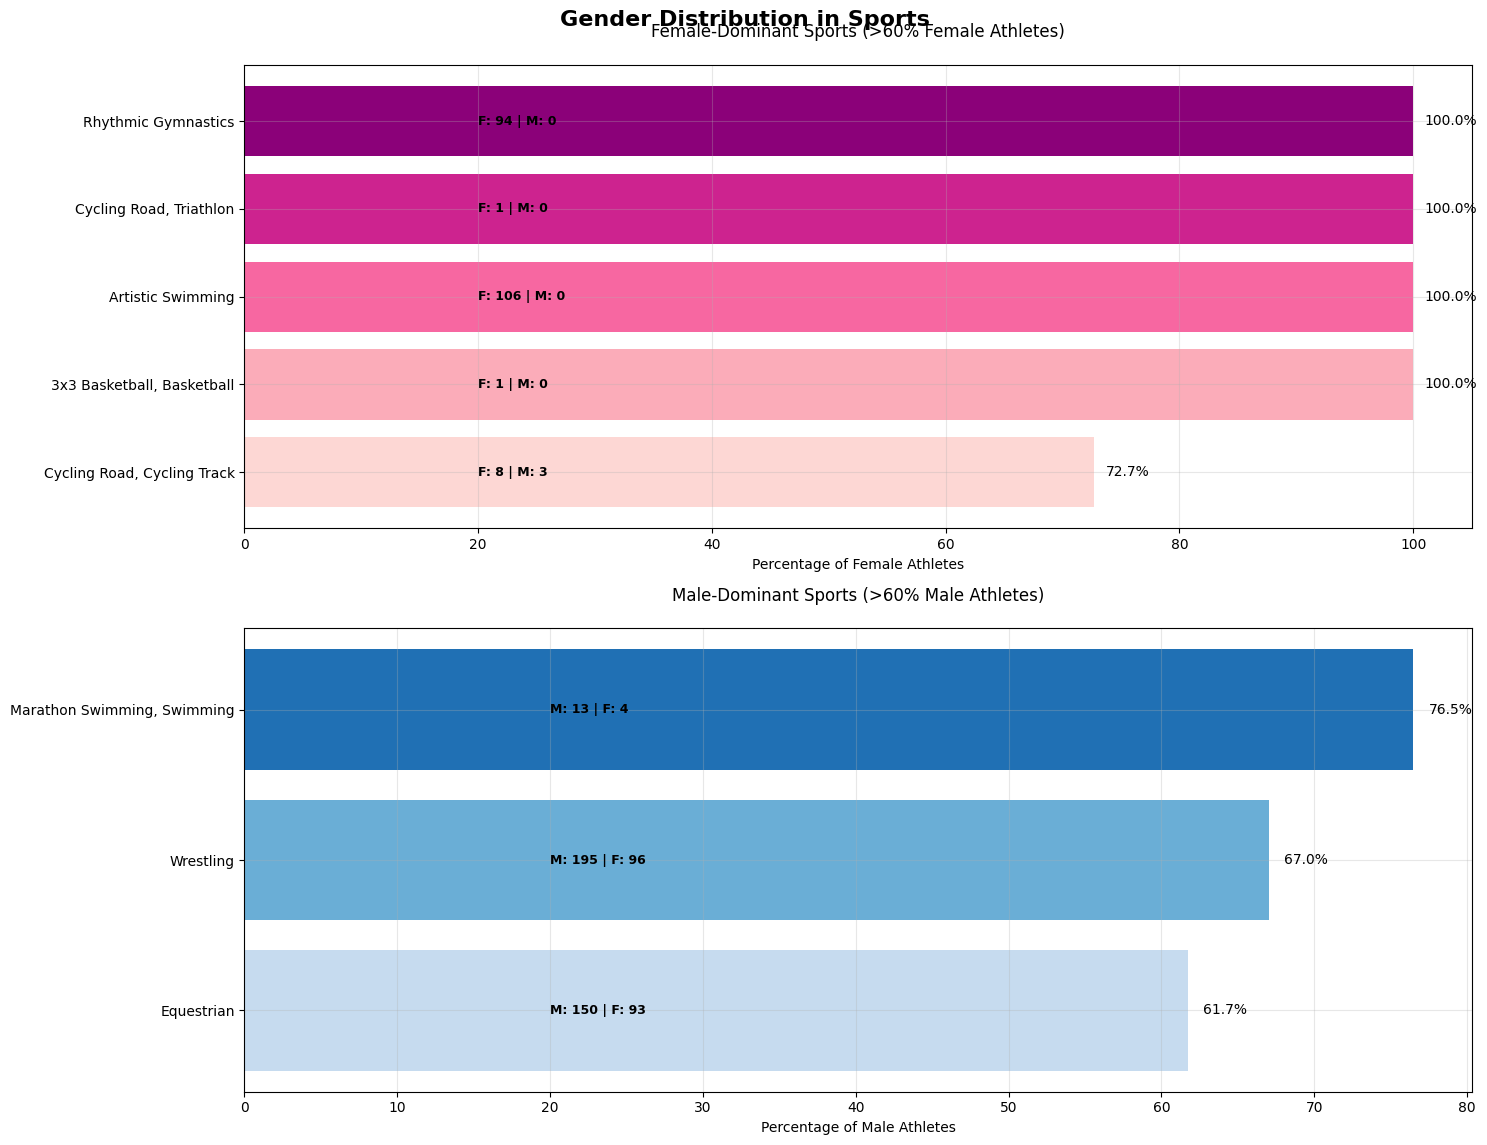

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_and_save_gender_plots(female_dominant_sports, male_dominant_sports, save_path='gender_distribution_in_sports.png'):
    # Set the style for better-looking graphs
    plt.style.use('default')
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'

    # Create figure and axes with larger size
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    fig.suptitle('Gender Distribution in Sports\n', fontsize=16, fontweight='bold', y=0.95)

    # Sort sports by female proportion for better visualization
    female_dominant_sports = female_dominant_sports.sort_values('FemaleProportion', ascending=True)
    male_dominant_sports = male_dominant_sports.sort_values('MaleProportion', ascending=True)

    # Plot 1: Female-Dominant Sports
    bars1 = ax1.barh(female_dominant_sports.index, 
                     female_dominant_sports['FemaleProportion'] * 100,
                     color=sns.color_palette("RdPu", len(female_dominant_sports)))

    # Add percentage labels
    for bar in bars1:
        width = bar.get_width()
        ax1.text(width + 1, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}%',
                 va='center', fontsize=10)

    # Add count labels
    for idx, row in enumerate(female_dominant_sports.itertuples()):
        ax1.text(20, idx,
                 f'F: {row.Female:,} | M: {row.Male:,}',
                 va='center', color='black', fontweight='bold', fontsize=9)

    ax1.set_title('Female-Dominant Sports (>60% Female Athletes)', pad=20)
    ax1.set_xlabel('Percentage of Female Athletes')
    ax1.grid(True, alpha=0.3)

    # Plot 2: Male-Dominant Sports
    bars2 = ax2.barh(male_dominant_sports.index,
                     male_dominant_sports['MaleProportion'] * 100,
                     color=sns.color_palette("Blues", len(male_dominant_sports)))

    # Add percentage labels
    for bar in bars2:
        width = bar.get_width()
        ax2.text(width + 1, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}%',
                 va='center', fontsize=10)

    # Add count labels
    for idx, row in enumerate(male_dominant_sports.itertuples()):
        ax2.text(20, idx,
                 f'M: {row.Male:,} | F: {row.Female:,}',
                 va='center', color='black', fontweight='bold', fontsize=9)

    ax2.set_title('Male-Dominant Sports (>60% Male Athletes)', pad=20)
    ax2.set_xlabel('Percentage of Male Athletes')
    ax2.grid(True, alpha=0.3)

    # Adjust layout
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()
    
    # Close the figure to free up memory
    plt.close()

# Call the function with your data
create_and_save_gender_plots(female_dominant_sports, male_dominant_sports)

### Gender Distribution Across Sports

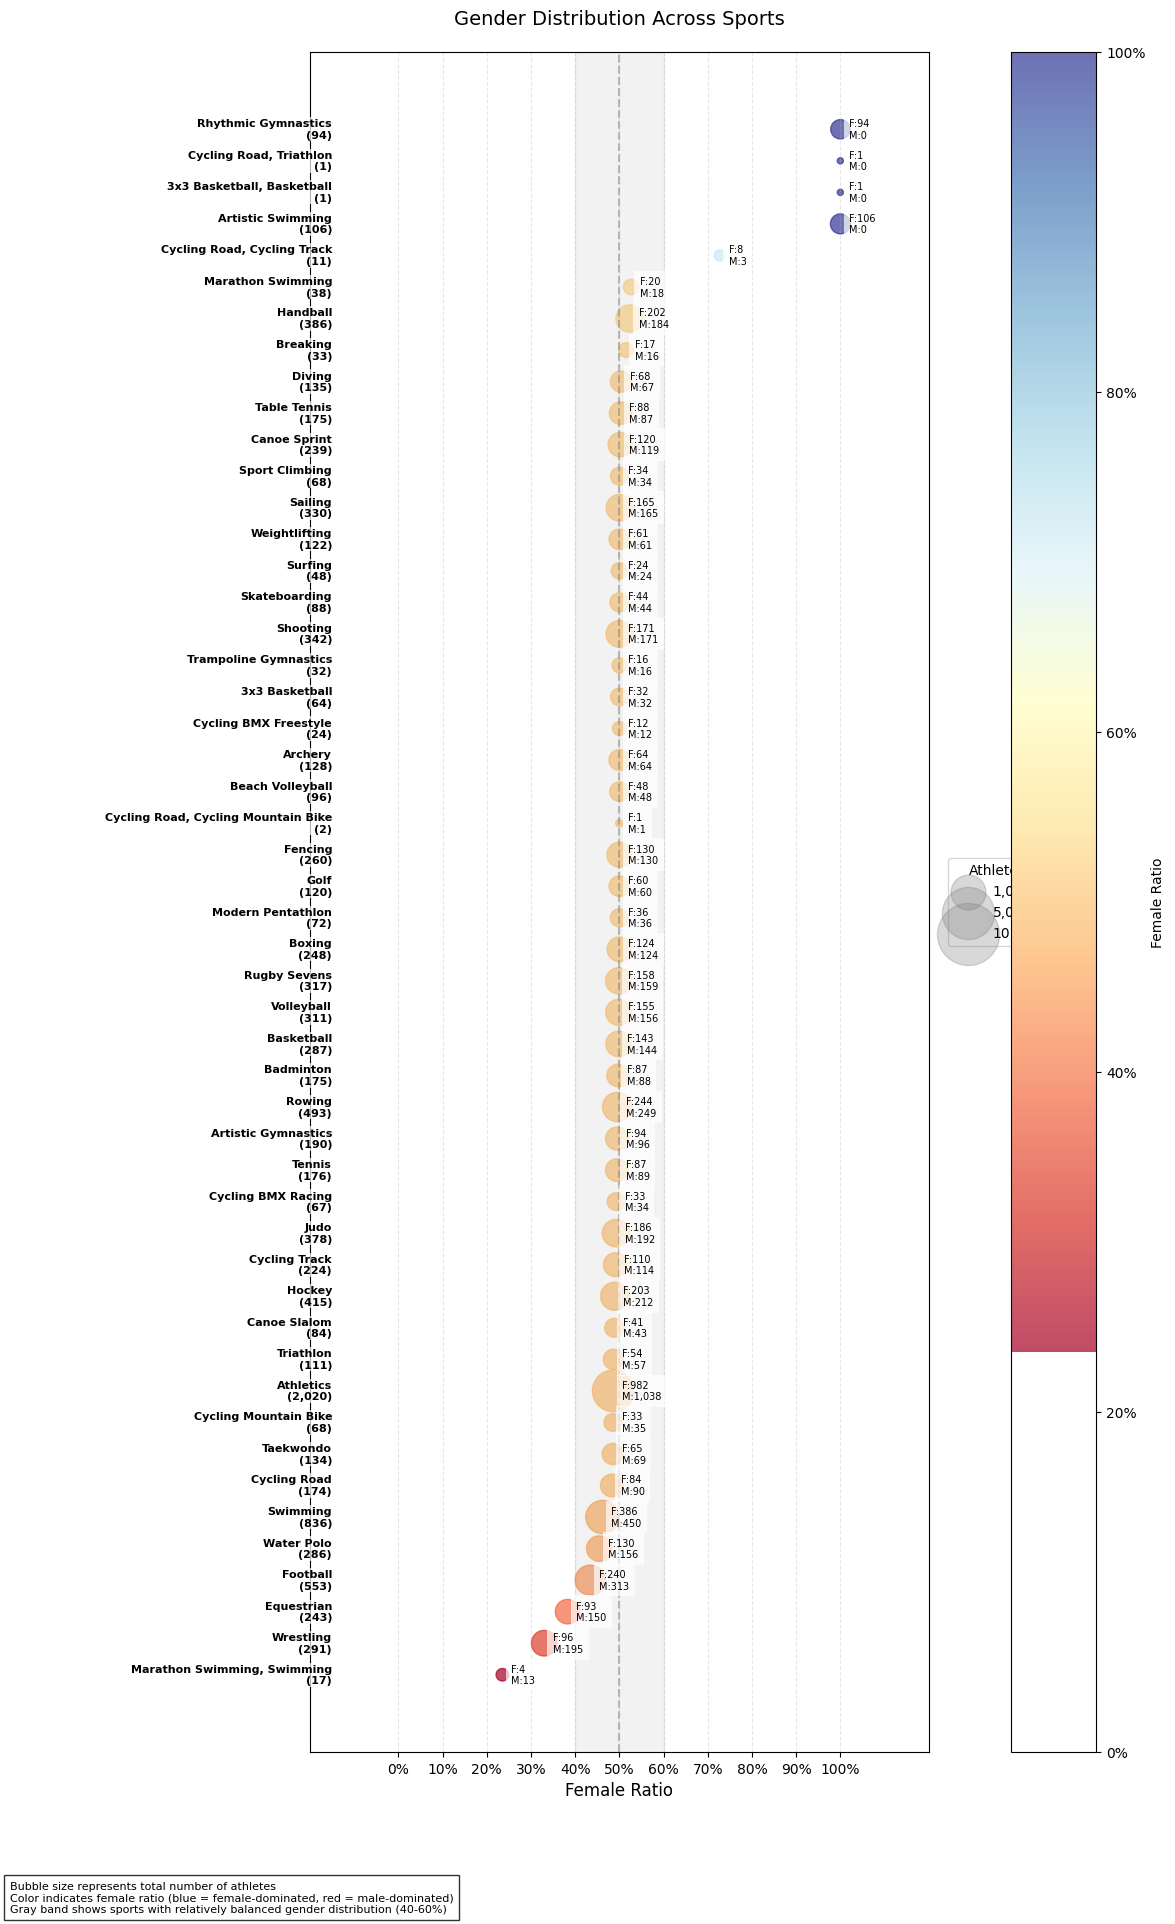

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def create_gender_distribution_plot(df, save_path='gender_distribution_scatter.png'):
    # Set the style
    plt.style.use('default')
    
    # Create figure with adjusted size
    fig = plt.figure(figsize=(15, 20))  # Reduced height, increased width
    
    # Add subplot with specific positioning to accommodate labels
    ax = plt.subplot2grid((1, 1), (0, 0))
    
    # Calculate the metrics
    sports_gender_counts = df.groupby(['disciplines', 'gender']).size().unstack(fill_value=0)
    total_athletes = sports_gender_counts.sum(axis=1)
    female_ratio = sports_gender_counts['Female'] / total_athletes
    
    # Sort values for better visualization
    sorted_indices = female_ratio.sort_values().index
    female_ratio = female_ratio[sorted_indices]
    sports_gender_counts = sports_gender_counts.loc[sorted_indices]
    total_athletes = total_athletes[sorted_indices]
    
    # Create the scatter plot
    scatter = plt.scatter(female_ratio, range(len(sports_gender_counts)), 
                         s=np.sqrt(total_athletes)*20,  # Adjusted size scaling
                         c=female_ratio,
                         cmap='RdYlBu',
                         alpha=0.7)
    
    # Add sport names and counts with adjusted positioning
    for idx, (sport, ratio) in enumerate(female_ratio.items()):
        # Add sport name
        plt.text(-0.15, idx, 
                f"{sport}\n({total_athletes[sport]:,})",
                ha='right', va='center',
                fontsize=8, fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))
        
        # Add gender counts
        plt.text(ratio + 0.02, idx,
                f"F:{sports_gender_counts.loc[sport, 'Female']:,}\nM:{sports_gender_counts.loc[sport, 'Male']:,}",
                va='center', fontsize=7,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
    # Add reference lines
    plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='Equal ratio')
    plt.axvspan(0.4, 0.6, color='gray', alpha=0.1, label='40-60% range')
    
    # Customize the plot
    plt.title('Gender Distribution Across Sports', fontsize=14, pad=20)
    plt.xlabel('Female Ratio', fontsize=12)
    
    # Set x-axis limits and ticks
    plt.xlim(-0.2, 1.2)
    plt.xticks(np.arange(0, 1.1, 0.1), 
               [f'{x*100:.0f}%' for x in np.arange(0, 1.1, 0.1)])
    
    # Remove y-axis ticks
    plt.yticks([])
    
    # Add grid
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    
    # Add legend for bubble size with adjusted position
    legend_elements = [
        plt.scatter([], [], s=np.sqrt(1000)*20, c='gray', alpha=0.3, label='1,000'),
        plt.scatter([], [], s=np.sqrt(5000)*20, c='gray', alpha=0.3, label='5,000'),
        plt.scatter([], [], s=np.sqrt(10000)*20, c='gray', alpha=0.3, label='10,000')
    ]
    ax.legend(handles=legend_elements, title="Athletes",
             loc='center left', bbox_to_anchor=(1.02, 0.5))
    
    # Add colorbar with adjusted position
    cbar = plt.colorbar(scatter, label='Female Ratio', pad=0.1)
    cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    
    # Add explanatory text
    plt.figtext(0.1, 0.02,
                'Bubble size represents total number of athletes\n'
                'Color indicates female ratio (blue = female-dominated, red = male-dominated)\n'
                'Gray band shows sports with relatively balanced gender distribution (40-60%)',
                fontsize=8, bbox=dict(facecolor='white', alpha=0.8))
    
    # Adjust layout with specific margins
    plt.subplots_adjust(left=0.3, right=0.85, top=0.95, bottom=0.1)
    
    # Save the plot with adjusted DPI and size
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
    # Close the figure
    plt.close()

# Call the function with your dataframe
create_gender_distribution_plot(df)

### Gender Distribution by Sports for Each Country

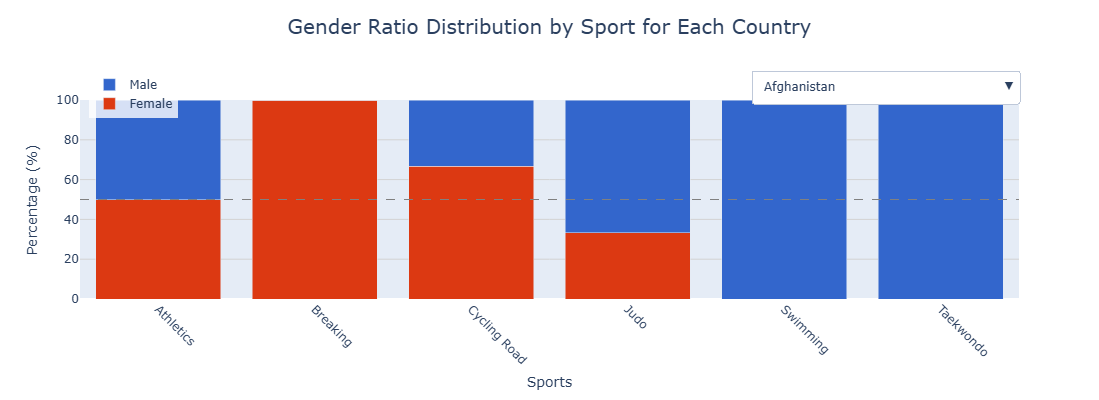

In [22]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

def create_gender_ratio_plot(df):
    # Calculate gender counts and ratios by country and sport
    gender_country_sport = df.groupby(['nationality_long', 'disciplines', 'gender']).size().unstack(fill_value=0).reset_index()
    
    # Calculate total and ratios
    gender_country_sport['Total'] = gender_country_sport['Female'] + gender_country_sport['Male']
    gender_country_sport['Female_Ratio'] = (gender_country_sport['Female'] / gender_country_sport['Total'] * 100).round(1)
    gender_country_sport['Male_Ratio'] = (gender_country_sport['Male'] / gender_country_sport['Total'] * 100).round(1)
    
    # Create hover text
    gender_country_sport['hover_text'] = (
        'Sport: ' + gender_country_sport['disciplines'] + '<br>' +
        'Female Athletes: ' + gender_country_sport['Female'].astype(str) + 
        ' (' + gender_country_sport['Female_Ratio'].astype(str) + '%)<br>' +
        'Male Athletes: ' + gender_country_sport['Male'].astype(str) + 
        ' (' + gender_country_sport['Male_Ratio'].astype(str) + '%)<br>' +
        'Total Athletes: ' + gender_country_sport['Total'].astype(str)
    )
    
    # Create the figure
    fig = go.Figure()
    
    # Add traces for both female and male ratios
    for country in sorted(gender_country_sport['nationality_long'].unique()):
        country_data = gender_country_sport[gender_country_sport['nationality_long'] == country]
        
        fig.add_trace(go.Bar(
            name='Female',
            x=country_data['disciplines'],
            y=country_data['Female_Ratio'],
            customdata=country_data['hover_text'],
            marker_color='#DC3912',
            visible=False,
            hovertemplate='%{customdata}<extra></extra>'
        ))
        
        fig.add_trace(go.Bar(
            name='Male',
            x=country_data['disciplines'],
            y=country_data['Male_Ratio'],
            base=country_data['Female_Ratio'],
            customdata=country_data['hover_text'],
            marker_color='#3366CC',
            visible=False,
            hovertemplate='%{customdata}<extra></extra>'
        ))
    
    # Make first country visible
    fig.data[0].visible = True
    fig.data[1].visible = True
    
    # Create dropdown menu
    dropdown_buttons = []
    for i, country in enumerate(sorted(gender_country_sport['nationality_long'].unique())):
        visible = [False] * len(fig.data)
        visible[i*2] = True  # Female data
        visible[i*2+1] = True  # Male data
        
        dropdown_buttons.append(
            dict(
                args=[{'visible': visible}],
                label=country,
                method='update'
            )
        )
    
    # Update layout
    fig.update_layout(
        title={
            'text': 'Gender Ratio Distribution by Sport for Each Country',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=20)
        },
        showlegend=True,
        barmode='stack',
        height=400,
        width=700,
        hovermode='x',
        
        # Add dropdown
        updatemenus=[{
            'buttons': dropdown_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 1.0,
            'y': 1.15,
            'xanchor': 'right',
            'yanchor': 'top'
        }],
        
        # Axes
        xaxis=dict(
            title='Sports',
            tickangle=45,
            gridcolor='lightgray'
        ),
        yaxis=dict(
            title='Percentage (%)',
            range=[0, 100],
            gridcolor='lightgray'
        ),
        
        # Legend
        legend=dict(
            yanchor="top",
            y=1.15,
            xanchor="left",
            x=0.01,
            bgcolor='rgba(255, 255, 255, 0.8)'
        ),
        
        # Add a reference line at 50%
        shapes=[
            dict(
                type='line',
                yref='y',
                y0=50,
                y1=50,
                xref='paper',
                x0=0,
                x1=1,
                line=dict(
                    color='gray',
                    width=1,
                    dash='dash'
                )
            )
        ]
    )
    
    return fig

# Create and display the plot
fig = create_gender_ratio_plot(df)
fig.show()
fig.write_html("gender_ratio_distrb_bysport_eachcountry.html")